# Introduction

## 第六章

### 密度估计、K近邻和K-means

SDSS光谱样品的一个特征是“great wall”，一个位于几百兆帕斯卡之外的星系丝。great wall数据属于光谱样本

SDSS“ Great Wall”内的星系核密度估计。左上图显示的是由赤道平面（赤纬〜0度）的空间位置（红移测量的赤经和距离）投影的星系点。 剩下的图显示使用三种内核的核密度估计的这些点的密度的估计。

```python
if use_sklearn_KDE:
    kde1 = KernelDensity(5, kernel='gaussian')
    log_dens1 = kde1.fit(X).score_samples(Xgrid)
    dens1 = X.shape[0] * np.exp(log_dens1).reshape((Ny, Nx))

    kde2 = KernelDensity(5, kernel='tophat')
    log_dens2 = kde2.fit(X).score_samples(Xgrid)
    dens2 = X.shape[0] * np.exp(log_dens2).reshape((Ny, Nx))

    kde3 = KernelDensity(5, kernel='exponential')
    log_dens3 = kde3.fit(X).score_samples(Xgrid)
    dens3 = X.shape[0] * np.exp(log_dens3).reshape((Ny, Nx))

else:
    kde1 = KDE(metric='gaussian', h=5)
    dens1 = kde1.fit(X).eval(Xgrid).reshape((Ny, Nx))

    kde2 = KDE(metric='tophat', h=5)
    dens2 = kde2.fit(X).eval(Xgrid).reshape((Ny, Nx))

    kde3 = KDE(metric='exponential', h=5)
    dens3 = kde3.fit(X).eval(Xgrid).reshape((Ny, Nx))
```

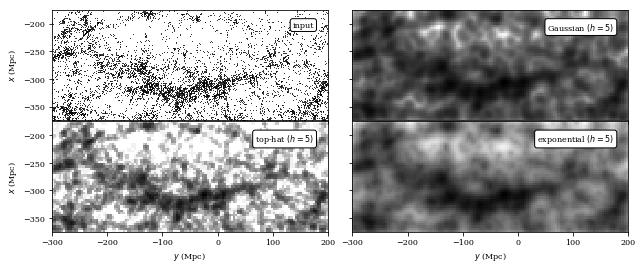

In [1]:
%run chapter6/fig_great_wall_KDE.py

** 使用K近邻 **

```python
kde = KDE(metric='gaussian', h=5)
dens_KDE = kde.fit(X).eval(Xgrid).reshape((Ny, Nx))

knn5 = KNeighborsDensity('bayesian', 5)
dens_k5 = knn5.fit(X).eval(Xgrid).reshape((Ny, Nx))

knn40 = KNeighborsDensity('bayesian', 40)
dens_k40 = knn40.fit(X).eval(Xgrid).reshape((Ny, Nx))
```

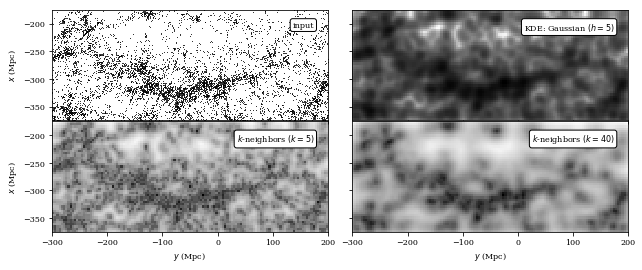

In [3]:
%run chapter6/fig_great_wall.py

** K-means **

使用的恒星金属度数据的K均值分析,只用两个属性：```X = np.vstack([data['FeH'], data['alphFe']]).T```

```python
clf = KMeans(n_clusters)
clf.fit(scaler.fit_transform(X))
```

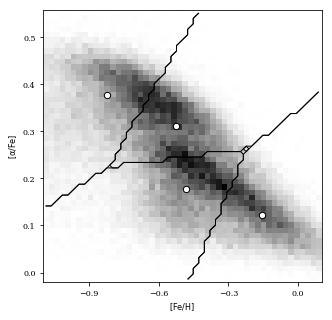

In [4]:
%run chapter6/fig_kmeans_metallicity.py

## [第七章](chapter7/chapter7.ipynb)

- 主要讲了使用PCA重建SDSS谱

## [第九章](chapter9/chapter9.ipynb)

- 主要讲了从不可变主序列恒星中分离可变的RR Lyrae恒星的各种分类方法

## 第十章

### LINEAR数据的聚类

LINEAR数据集中周期变化恒的无监督聚类分析。 上面的图显示使用两个属性（g-i和log P）以及12个高斯混合而得到的聚类。 彩色符号标记五个最重要的集群。 最下面一行显示了基于七个属性（颜色u-g，g-i，i-K和J-K; logP，光曲线幅度和光曲线偏度）的聚类的类似图，以及 15个高斯混合。

LINEAR数据集中周期变化恒的无监督聚类分析。 使用七个属性（颜色u - g，g - i，i - K和J - K; log P，光曲线幅度和光曲线偏度）以及15个高斯混合来导出簇。

@pickle_results: using precomputed results from 'LINEAR_clustering.pkl'
number of components: 11
\begin{tabular}{|l|lllllll|}
   \hline
   & $u-g$
   & $g-i$
   & $i-K$
   & $J-K$
   & $\log(P)$
   & amplitude
   & skew
\\
   \hline
   1 
 & $1.15 \pm 0.08$ 
 & $0.30 \pm 0.06$ 
 & $1.14 \pm 0.20$ 
 & $0.30 \pm 0.15$ 
 & $-0.24 \pm 0.06$ 
 & $0.67 \pm 0.18$ 
 & $-0.18 \pm 1.07$ 
\\
   2 
 & $1.18 \pm 0.11$ 
 & $-0.00 \pm 0.12$ 
 & $0.93 \pm 0.35$ 
 & $0.24 \pm 0.16$ 
 & $-0.48 \pm 0.05$ 
 & $0.43 \pm 0.10$ 
 & $0.34 \pm 1.06$ 
\\
   3 
 & $1.47 \pm 0.34$ 
 & $0.76 \pm 0.25$ 
 & $1.52 \pm 0.36$ 
 & $0.50 \pm 0.14$ 
 & $-0.53 \pm 0.06$ 
 & $0.50 \pm 0.14$ 
 & $0.87 \pm 1.04$ 
\\
   4 
 & $1.19 \pm 0.07$ 
 & $0.00 \pm 0.13$ 
 & $0.88 \pm 0.25$ 
 & $0.30 \pm 0.17$ 
 & $-0.24 \pm 0.06$ 
 & $0.70 \pm 0.19$ 
 & $-0.25 \pm 0.86$ 
\\
   5 
 & $1.08 \pm 0.11$ 
 & $-0.03 \pm 0.12$ 
 & $0.78 \pm 0.17$ 
 & $0.19 \pm 0.17$ 
 & $-1.20 \pm 0.08$ 
 & $-3.43 \pm 19.31$ 
 & $0.17 \pm 1.85$ 
\\
   6 
 & $1

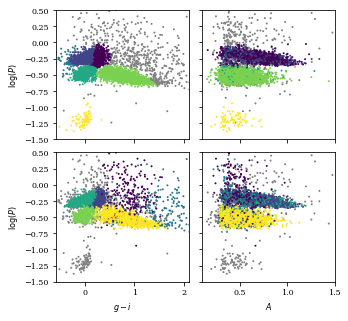

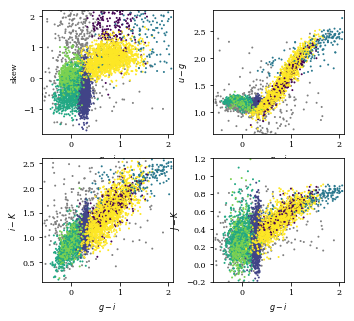

In [10]:
%run chapter10/fig_LINEAR_clustering.py

### LINEAR数据的GMMBayes分类

使用高斯混合模型贝叶斯分类器对来自LINEAR数据集的周期性变化恒星的监督分类。 训练样本包含五个输入类。 上面的显示使用两个属性（g-i和log P）导出的聚类，下面的显示了基于七个属性（颜色u-g，g-i，i-K和J-K; log P，光曲线幅度和光曲线偏度）。

```python
Xtrain = X[i][i_train]
Xtest = X[i][i_test]
ytrain = y[i][i_train]
ytest = y[i][i_test]

clf = GMMBayes(n_components, min_covar=1E-5, covariance_type='full')
clf.fit(Xtrain, ytrain)
y_pred = clf.predict(Xtest)
```

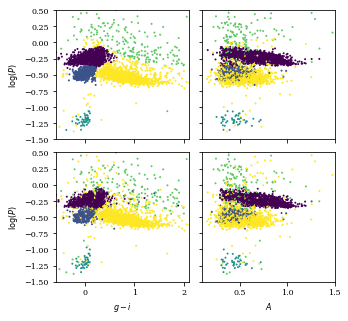

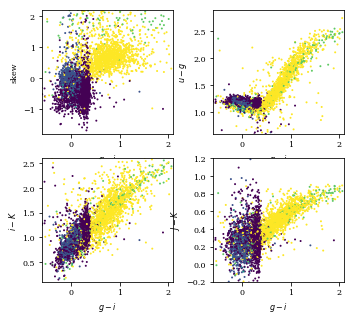

In [7]:
%run chapter10/fig_LINEAR_GMMBayes.py

### LINEAR数据的SVM分类

使用支持向量机方法从LINEAR数据集中对周期性变化恒星进行监督分类。 训练样本包含五个输入类。 顶部显示使用两个属性（g-i和log P）导出的聚类底部显示了基于七个属性（颜色u-g，g-i，i-K和J-K; log P，光曲线幅度和光曲线偏度）。

```python
Xtrain = X[i][i_train]
Xtest = X[i][i_test]
ytrain = y[i][i_train]
ytest = y[i][i_test]

clf = SVC(kernel='linear', class_weight=None)
clf.fit(Xtrain, ytrain)
y_pred = clf.predict(Xtest)
```

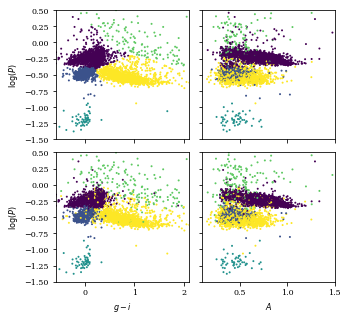

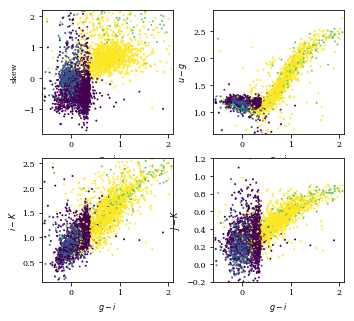

In [8]:
%run chapter10/fig_LINEAR_SVM.py